import nltk

In [ ]:
nltk.download()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
dt = pd.read_csv("spam.csv")

In [4]:
type(dt)

pandas.core.frame.DataFrame

In [5]:
dt.head(10)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
dt['spam'] = dt['type'].map( {'spam':1,'ham':0} ).astype(int)
dt.head(5)

,type,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
print("COLUMS IN  THE GIVEN DATA:")
for col in dt.columns:
    print(col)

COLUMS IN  THE GIVEN DATA:
type
text
spam


In [8]:
t=len(dt['type'])
print("NO OF ROWS IN REVIEW COLUMN:",t)
t=len(dt['text'])
print("NO OF ROWS IN liked COLUMN:",t)

NO OF ROWS IN REVIEW COLUMN: 116
NO OF ROWS IN liked COLUMN: 116


In [9]:
dt['text'][1] #before

'Ok lar... Joking wif u oni...'

In [10]:
def tokenizer(text):
    return text.split()

In [11]:
dt['text']=dt['text'].apply(tokenizer)

In [12]:
dt['text'][1] #after

['Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...']

In [14]:
dt['text'][1] #before

['Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...']

In [15]:
import nltk
from nltk.stem.snowball import SnowballStemmer
porter = SnowballStemmer("english", ignore_stopwords=False)

In [16]:
def stem_it(text):
    return [porter.stem(word) for word in text]

In [17]:
dt['text']=dt['text'].apply(stem_it)

In [18]:
dt['text'][1] #after

['ok', 'lar...', 'joke', 'wif', 'u', 'oni...']

In [19]:
dt['text'][56] #before

['congrats!',
 '1',
 'year',
 'special',
 'cinema',
 'pass',
 'for',
 '2',
 'is',
 'yours.',
 'call',
 '09061209465',
 'now!',
 'c',
 'suprman',
 'v,',
 'matrix3,',
 'starwars3,',
 'etc',
 'all',
 '4',
 'free!',
 'bx420-ip4-5we.',
 '150pm.',
 'dont',
 'miss',
 'out!']

In [20]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [21]:
def lemmit_it(text):
    return [lemmatizer.lemmatize(word, pos="a") for word in text]

In [22]:
dt['text']=dt['text'].apply(lemmit_it)

In [23]:
dt['text'][56] #after

['congrats!',
 '1',
 'year',
 'special',
 'cinema',
 'pass',
 'for',
 '2',
 'is',
 'yours.',
 'call',
 '09061209465',
 'now!',
 'c',
 'suprman',
 'v,',
 'matrix3,',
 'starwars3,',
 'etc',
 'all',
 '4',
 'free!',
 'bx420-ip4-5we.',
 '150pm.',
 'dont',
 'miss',
 'out!']

In [24]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [25]:
def stop_it(text):
    review = [word for word in text if not word in stop_words ]
    return review

In [26]:
dt['text']=dt['text'].apply(stop_it)

In [27]:
dt['text'][4]

['nah', 'think', 'goe', 'usf,', 'live', 'around', 'though']

In [28]:
dt.head(10)

,type,text,spam
0,ham,"[go, jurong, point,, crazy.., avail, onli, bug...",0
1,ham,"[ok, lar..., joke, wif, u, oni...]",0
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",1
3,ham,"[u, dun, say, earli, hor..., u, c, alreadi, sa...",0
4,ham,"[nah, think, goe, usf,, live, around, though]",0
5,spam,"[freemsg, hey, darl, 3, week, word, back!, i'd...",1
6,ham,"[even, brother, like, speak, me., treat, like,...",0
7,ham,"[per, request, mell, mell, (oru, minnaminungin...",0
8,spam,"[winner!!, valu, network, custom, select, rece...",1
9,spam,"[mobil, 11, month, more?, u, r, entitl, updat,...",1


In [29]:
dt['text']=dt['text'].apply(''.join)

In [30]:
dt.head()

,type,text,spam
0,ham,"gojurongpoint,crazy..availonlibugingreatworldl...",0
1,ham,oklar...jokewifuoni...,0
2,spam,freeentri2wklicompwinfacupfinaltkts21stmay2005...,1
3,ham,udunsayearlihor...ucalreadisay...,0
4,ham,"nahthinkgoeusf,livearoundthough",0


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
y=dt.spam.values
x=tfidf.fit_transform(dt['text'])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_text,y_train,y_text=train_test_split(x,y,random_state=1,test_size=0.2,shuffle=False)

In [33]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_text)
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_pred,y_text)*100
print("accuracy:"+str(acc_log)+" %" )

accuracy:87.5 %


In [34]:
from sklearn.svm import LinearSVC

linear_svc =LinearSVC(random_state=0)
linear_svc.fit(x_train,y_train)
y_pred=linear_svc.predict(x_text)
acc_linear_svc = accuracy_score(y_pred,y_text)*100
print("accuracy: "+str(acc_linear_svc)+" %" )

accuracy: 87.5 %


In [35]:
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor(random_state = 100)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_text)
acc_regressor = accuracy_score(y_pred,y_text)*100
print("accuracy: "+str(acc_regressor)+" %")

accuracy: 87.5 %


Text(0, 0.5, 'Accuracy score')

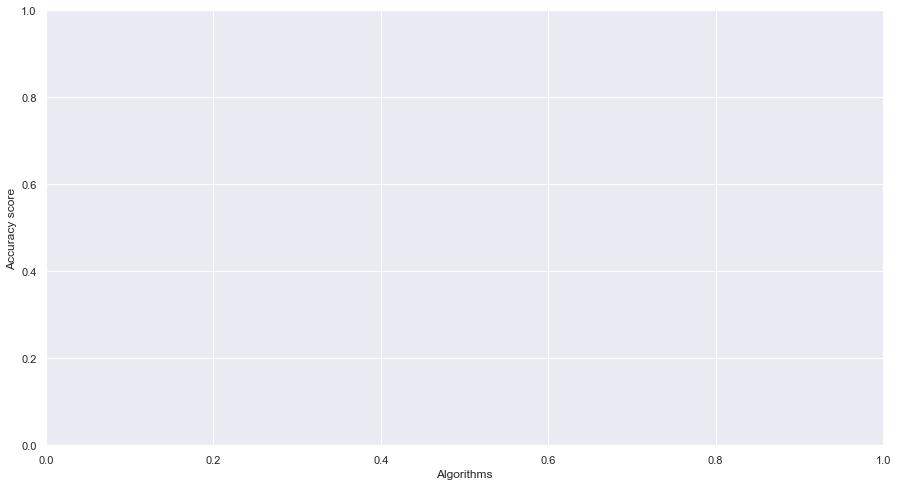

In [36]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")

plt.ylabel("Accuracy score")